[Reference: theoretical ecology / A simple Metropolis-Hastings MCMC in R](https://theoreticalecology.wordpress.com/2010/09/17/metropolis-hastings-mcmc-in-r/)

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 7, 5

In [3]:
import numpy as np
import scipy as sp
import numpy.random as npr
import seaborn as sns
import matplotlib.pyplot as plt

# Create Data Set

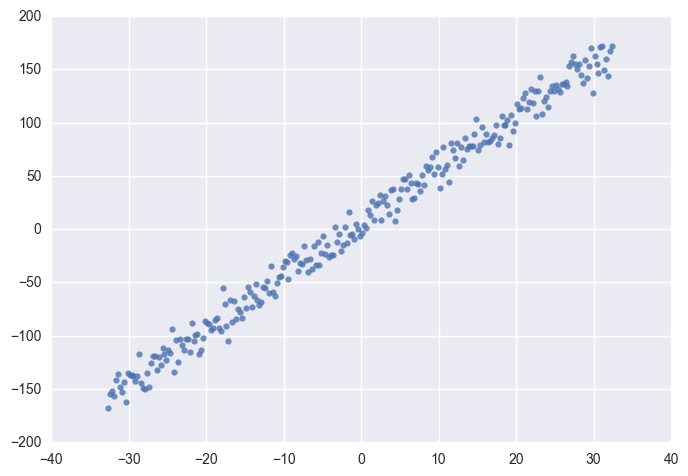

In [4]:
trueA = 5
trueB = 7
trueSD = 10
sample_size = 261
x = np.arange(-sample_size/8, sample_size/8, (sample_size*2/8)/sample_size)
y = trueA *x + trueB + npr.normal(loc=0, scale=trueSD, size=sample_size)

sns.regplot(x=x, y=y, fit_reg=False)

# Define Statistical Model

In [5]:
def likelihood(param):
    a = param[0][0]
    b = param[0][1]
    sd = param[0][2]
    
    pred = a*x + b # 要するにこれが「モデル」
    
    sumSqError = np.power((y - pred), 2).sum()
    
    likelihoodsum = ((sample_size/2)*(np.log(1)-np.log(np.power(sd,2)))) + (- 1/(2*np.power(sd,2)) * sumSqError)
    
    return likelihoodsum

# Define Next

次に移動した点での $P^*(X)$　に相当するものを考える。<br>
京大の資料に従って、一つずつパラメータを動かす

In [6]:
def next_param(param, param_index):
    a_next = param[0][0] ; b_next = param[0][1] ; sd_next = param[0][2]
    
    if param_index == 0:
        a_next = param[0][0] + npr.uniform(-1.5, 1.5)
    elif param_index == 1:
        b_next = param[0][1] + npr.uniform(-5.5,5.5)
    elif param_index == 2:
        sd_next = param[0][2] + npr.uniform(-1.5, 1.5)
        
    return np.array([[a_next, b_next, sd_next]])

In [7]:
def next_param2(param):
    a_next = param[0][0] ; b_next = param[0][1] ; sd_next = param[0][2]


    a_next = param[0][0] + npr.uniform(-1.5,1.5)
    b_next = param[0][1] + npr.uniform(-3.5,3.5)
    sd_next = param[0][2] + npr.uniform(-1.5,1.5)

    return np.array([[a_next, b_next, sd_next]])

# MCMC

In [8]:
num_sampling = 9500
chain = np.zeros((num_sampling, 1, 3))
chain[0][0][0] = 20 # starting value for a
chain[0][0][1] = 15 # starting value for b
chain[0][0][2] = 15 # starting value for sd

num_accepted = 0
for i in range(num_sampling-1):
    chain_previous = chain[i][:]
    
    proposal = next_param2(chain[i])

    probab = likelihood(proposal) - likelihood(chain_previous)
    #u = np.exp(npr.uniform(0, 1))
    if 0  < probab:
        chain[i+1] = proposal
        num_accepted += 1
    else:
        chain[i+1] = chain[i]

In [9]:
num_accepted

61

In [10]:
num_sampling = 9500
chain = np.zeros((num_sampling, 1, 3))
chain[0][0][0] = 20 # starting value for a
chain[0][0][1] = 15 # starting value for b
chain[0][0][2] = 15 # starting value for sd

num_accepted = 0
for i in range(num_sampling-1):
    chain_previous = chain[i][:]
    chain_new = np.zeros((1, 1, 3))
    
    for p in range(3):
        proposal = next_param(chain_previous, p)
        
        probab = likelihood(proposal) - likelihood(chain_previous)
        #u = np.exp(npr.uniform(0, 1))
        if 0 < probab:
            chain_new[0][0][p] = proposal[0][p]
            num_accepted += 1
        else:
            chain_new[0][0][p] = chain[i][0][p]
            
    chain[i+1] = chain_new[0][:]

In [11]:
num_accepted

102

# Show Results

## a

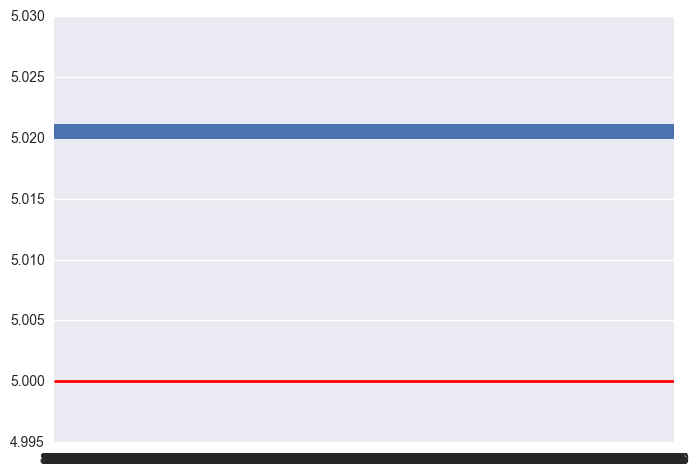

In [12]:
sns.pointplot(x=np.arange(8500, num_sampling, 1), y=chain[8500: , 0, 0])
plt.plot([0, num_sampling-8500], [5, 5], linewidth=2, color='red')

In [13]:
chain[8500: , 0, 0].mean()

5.0205123364938569

## b

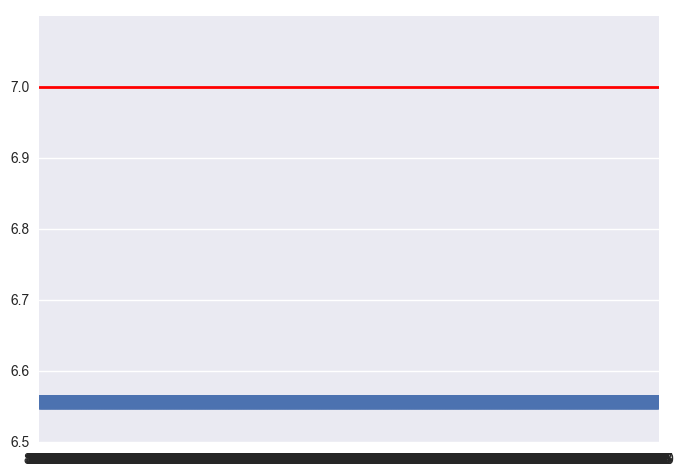

In [14]:
sns.pointplot(x=np.arange(8500, num_sampling, 1), y=chain[8500: , 0, 1])
plt.plot([0, num_sampling-8500], [7, 7], linewidth=2, color='red')

In [15]:
chain[8500: , 0, 1].mean()

6.556429106168518

## sd

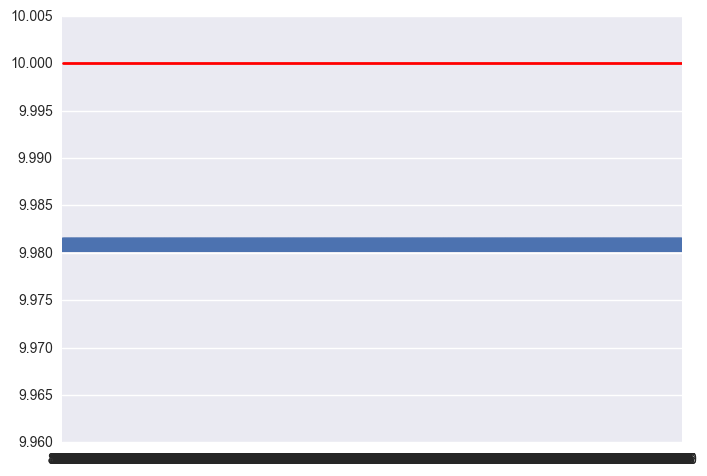

In [16]:
sns.pointplot(x=np.arange(8500, num_sampling, 1), y=chain[8500: , 0, 2])
plt.plot([0, num_sampling-8500], [10, 10], linewidth=2, color='red')

In [17]:
chain[8500: , 0, 2].mean()

9.9808395353273731